# Import Libraries and Dataset

In [1]:
import imageio
import matplotlib 
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import pydotplus         as pdp
import scipy.stats       as st
import seaborn           as sbn
import seaborn           as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold



from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, f1_score, make_scorer
from sklearn.metrics import accuracy_score, precision_score,recall_score, roc_auc_score, plot_confusion_matrix

In [2]:
# import data
df = pd.read_csv('UCI_Credit_Card.csv')
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
print('Shape of the dataset: ', df.shape)

Shape of the dataset:  (30000, 25)


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
# Structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
# count unique value of each variable
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

# Preprocessing the dataset

## Missing values

In [7]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [8]:
df.isnull().count()

ID                            30000
LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default.payment.next.month    30000
dtype: int64

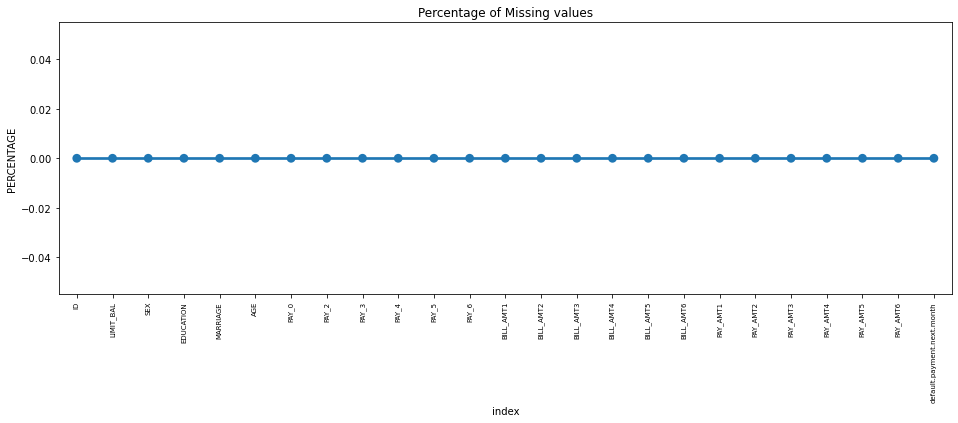

In [9]:
#  Plot to check missing value
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

DATASET HAS NO MISSING VALUE

## Duplicate values

In [10]:
# duplicate
print('Duplicate of Credit card Data:', len(df[df.duplicated()]))          

Duplicate of Credit card Data: 0


In [11]:
nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='0']
for feature in nan:
  print('{}: {}'.format(col,df[col].unique()))
print(df.apply(lambda col: col.unique()))

ID                            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
LIMIT_BAL                     [20000.0, 120000.0, 90000.0, 50000.0, 500000.0...
SEX                                                                      [2, 1]
EDUCATION                                                 [2, 1, 3, 5, 4, 6, 0]
MARRIAGE                                                           [1, 2, 3, 0]
AGE                           [24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 3...
PAY_0                                       [2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]
PAY_2                                       [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]
PAY_3                                       [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]
PAY_4                                       [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]
PAY_5                                          [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
PAY_6                                          [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]
BILL_AMT1                     [3913.0, 2

DATASET HAS NO DUPLICATE VALUE

## Phân tích chi tiết các biến của bộ dữ liệu

In [12]:
# Descriptive statistics of dataset
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [13]:
# Freequency of default payment next month variable
df['default.payment.next.month'].value_counts(normalize=True)*100

0    77.88
1    22.12
Name: default.payment.next.month, dtype: float64

0    77.88
1    22.12
Name: default.payment.next.month, dtype: float64


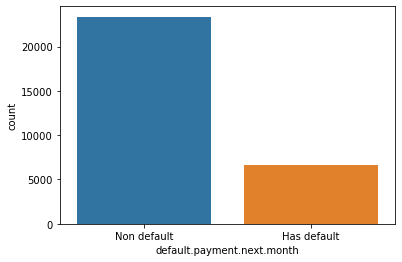

In [14]:
print((df['default.payment.next.month'].value_counts()/df['default.payment.next.month'].shape)*100)
#sns.countplot(df['Default'])
g = sns.countplot(df['default.payment.next.month'])
g.set_xticklabels(['Non default', 'Has default'])
plt.show()

> The target variable (Default Payment Next Month) is unbalanced since 77,88% of the customer are not defaulted and 22,12% are. This will affect our machine learning process so we will need to process the dataset later to handle the imbalance of the data


In [15]:
# Rename PAY_0 for consistency
df = df.rename(columns={'PAY_0':'PAY_1'})
print(f'Tên của các cột :', list(df.columns))

Tên của các cột : ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


In [16]:
df = df.drop(columns = 'ID')

Categorical variable:
* SEX
* EDUCATION
* MARRIAGE
* AGE

In [18]:
# Unique value of SEX. 1: male; 2: female
print('Distribution of "SEX" 1: Male; 2: Female:')
df['SEX'].value_counts()

Distribution of "SEX" 1: Male; 2: Female:


2    18112
1    11888
Name: SEX, dtype: int64

In [19]:
# EDUCATION: (1 = graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown, 0=unknown)
print('Distribution "EDUCATION": 1 = Graduate school, 2  = University, 3 = High school, 4 = Others, 5 = Unknown, 6 = Unknown, 0 = Unknown')
print(df['EDUCATION'].unique())
df['EDUCATION'].value_counts()

Distribution "EDUCATION": 1 = Graduate school, 2  = University, 3 = High school, 4 = Others, 5 = Unknown, 6 = Unknown, 0 = Unknown
[2 1 3 5 4 6 0]


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [22]:
# Change 0, 5, 6 to 4, equal to Others
# 1 = Graduate school, 2 = University, 3 = High school, 4 = Others
print('Distribution of EDUCATION: 1 = Graduate school, 2 = University, 3 = High school, 4 = Others')
df["EDUCATION"] = df["EDUCATION"].replace({0:4,5:4,6:4})
df["EDUCATION"].value_counts()

Distribution of EDUCATION: 1 = Graduate school, 2 = University, 3 = High school, 4 = Others


2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [23]:
# Maritage status: (1 = Married, 2 = Single, 3 = Others)
print('Distribution of "MARRIAGE: 1 = Married, 2 = Single, 3 = Others')
print(df['MARRIAGE'].unique())
df['MARRIAGE'].value_counts()

Distribution of "MARRIAGE: 1 = Married, 2 = Single, 3 = Others
[1 2 3 0]


2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [24]:
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

In [25]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [26]:
df['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [27]:
# Create a copy version of original dataframe
df_copy = df.copy()

## Handling outliers


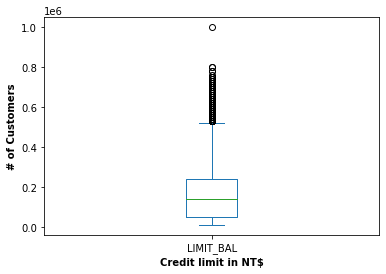

In [28]:
# Indentify the outliers using box plot
df['LIMIT_BAL'].plot(kind = 'box')
plt.xlabel('Credit limit in NT$', fontweight= 'bold')
plt.ylabel('# of Customers', fontweight = 'bold')
plt.show()

In [29]:
#Build function to remove outliers
def remove_outlier_using_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    df_final_output = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final_output

In [30]:
df['LIMIT_BAL'] = remove_outlier_using_IQR(df['LIMIT_BAL'])

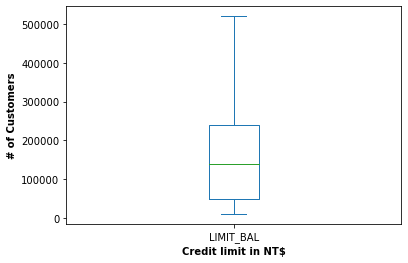

In [32]:
# Check again for the outliers
df['LIMIT_BAL'].plot(kind = 'box')
plt.xlabel('Credit limit in NT$', fontweight= 'bold')
plt.ylabel('# of Customers', fontweight = 'bold')
plt.show()

In [33]:
#Save pre-processed data to excel file
df.to_excel("Data_Processed.xlsx")

# EDA (Exploratory Data Analysis)

In [34]:
# Rename 'default.payment.next.month' to ' default '
df.rename(columns = {'default.payment.next.month':'Default'}, inplace = True)

In [35]:
# Create a new column "has_def" to show which customer has at least one payment from PAY_1 to PAY_6 
# 0 : no default; 1: has default

def_condition = (df.PAY_1 >1) | (df.PAY_2 >1) | (df.PAY_3 >1) | (df.PAY_4 >1) | (df.PAY_5 >1) | (df.PAY_6 >1)
df.loc[def_condition, "has_def"] = 1
df.loc[df.has_def.isna(), "has_def"] = 0

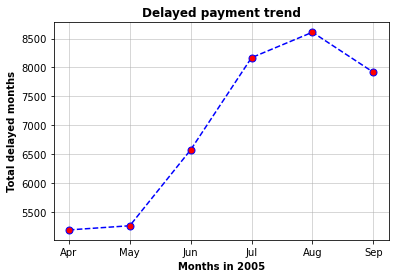

In [36]:
has_default = df[df['has_def']== 1]
default_trend = has_default[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)

fig,ax = plt.subplots()
ax.plot(default_trend,label="Test",color='blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=7)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1'],['Apr','May','Jun','Jul','Aug','Sep'])
plt.grid(True, linewidth=0.5, linestyle='-')
plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

In [37]:
df.drop('has_def', axis = 1, inplace = True)

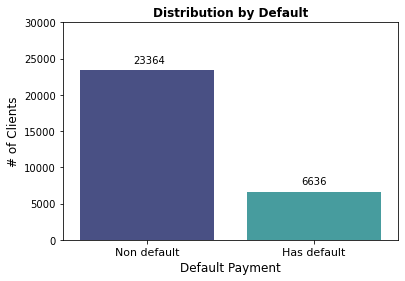

In [38]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="Default", data=df, palette="mako")

plt.xlabel("Default Payment", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,30000)
plt.xticks([0,1], ['Non default', 'Has default'], fontsize = 11)
plt.title('Distribution by Default',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

Number of Non-default customer is higher than the default one.


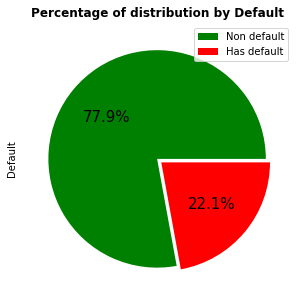

In [39]:
plt.figure(figsize=(7,5))

df['Default'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['green','red'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Non default', 'Has default'])
plt.title('Percentage of distribution by Default',weight ='bold')

plt.show()

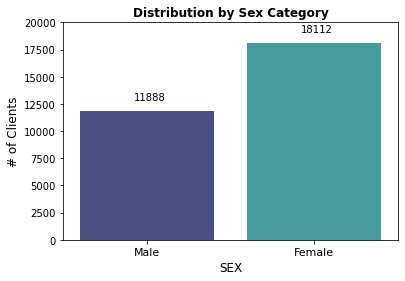

In [40]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="SEX", data=df, palette="mako")

plt.xlabel("SEX", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.title('Distribution by Sex Category',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

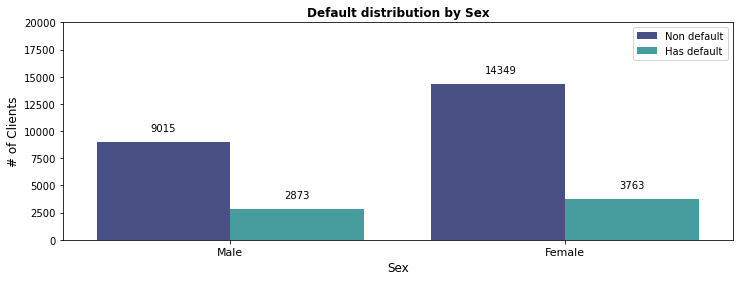

In [41]:
# Default status by sex
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'SEX', hue="Default", palette = 'mako')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.legend(labels=['Non default', 'Has default'])
plt.title('Default distribution by Sex',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

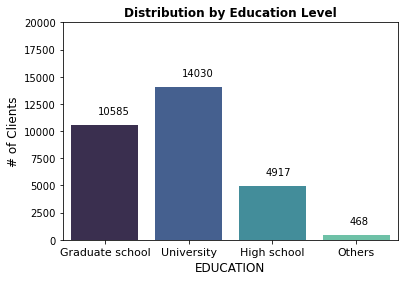

In [42]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="EDUCATION", data=df, palette="mako")

plt.xlabel("EDUCATION", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
#plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.xticks([0,1,2,3],['Graduate school', 'University', 'High school', 'Others'], fontsize = 11)
plt.title('Distribution by Education Level',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

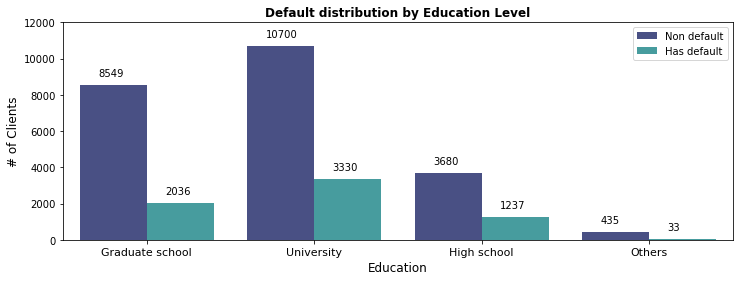

In [43]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'EDUCATION', hue="Default", palette = 'mako')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3],['Graduate school', 'University', 'High school', 'Others'], fontsize = 11)
plt.legend(labels=['Non default', 'Has default'])
plt.title('Default distribution by Education Level',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

In [44]:
df.groupby(by=['EDUCATION', 'SEX'])['Default'].value_counts(normalize = True)*100

EDUCATION  SEX  Default
1          1    0          79.191548
                1          20.808452
           2    0          81.864869
                1          18.135131
2          1    0          73.799777
                1          26.200223
           2    0          77.795749
                1          22.204251
3          1    0          72.613065
                1          27.386935
           2    0          76.358046
                1          23.641954
4          1    0          91.764706
                1           8.235294
           2    0          93.624161
                1           6.375839
Name: Default, dtype: float64

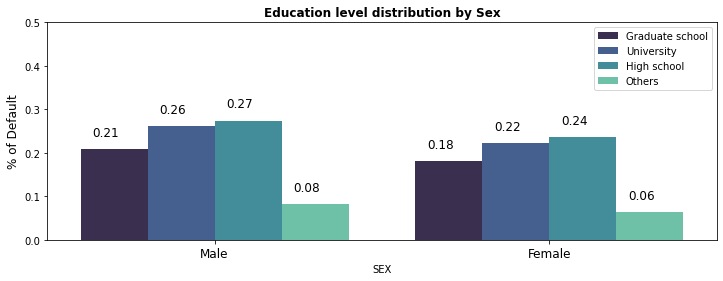

In [45]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "Default", hue = "EDUCATION", data = df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.legend(labels=['Graduate school', 'University', 'High school', 'Others'])
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.title('Education level distribution by Sex',weight ='bold')
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.show()

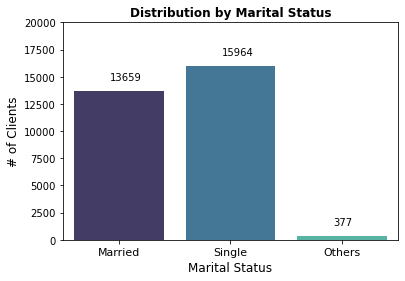

In [46]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x="MARRIAGE", data=df, palette="mako")

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
#plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 11)
plt.title('Distribution by Marital Status',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

In [47]:
df.groupby(by=['MARRIAGE', 'SEX'])['Default'].value_counts(normalize = True)

MARRIAGE  SEX  Default
1         1    0          0.740655
               1          0.259345
          2    0          0.780375
               1          0.219625
2         1    0          0.773386
               1          0.226614
          2    0          0.802784
               1          0.197216
3         1    0          0.710345
               1          0.289655
          2    0          0.797414
               1          0.202586
Name: Default, dtype: float64

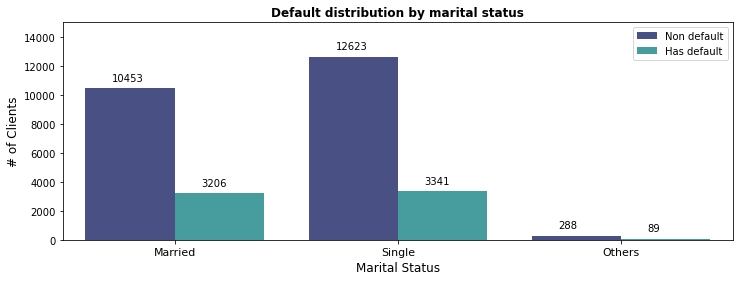

In [48]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'MARRIAGE', hue="Default", palette = 'mako')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 11)
plt.legend(labels=['Non default', 'Has default'])
plt.title('Default distribution by marital status',weight ='bold')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

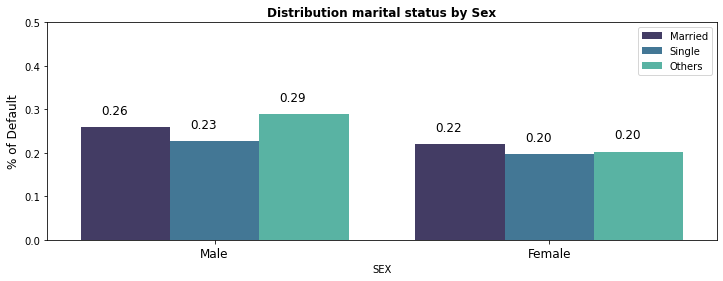

In [49]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "Default", hue = "MARRIAGE", data = df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.legend(labels=['Married', 'Single', 'Others'])
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.title('Distribution marital status by Sex',weight ='bold')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

In [50]:
# Create age group
df['Age_group'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(df['Age_group'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: Age_group, dtype: int64


In [51]:
df['Default'].groupby(df['Age_group']).value_counts(normalize = True)*100

Age_group  Default
(20, 25]   0          73.340222
           1          26.659778
(25, 30]   0          79.851582
           1          20.148418
(30, 35]   0          80.572809
           1          19.427191
(35, 40]   0          78.381127
           1          21.618873
(40, 50]   0          76.702748
           1          23.297252
(50, 60]   0          74.762143
           1          25.237857
(60, 80]   0          73.161765
           1          26.838235
Name: Default, dtype: float64

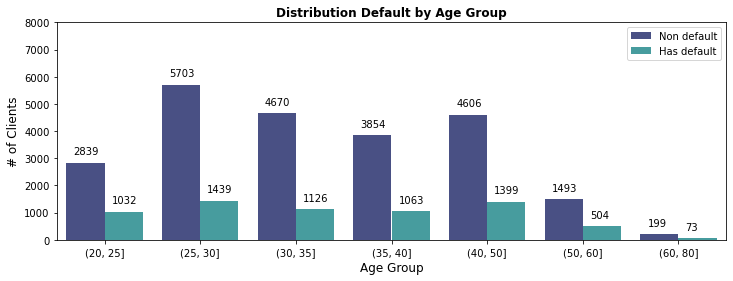

In [52]:
plt.figure(figsize=(12,4))

df['Age_group'] = df['Age_group'].astype('str')
Age_group_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'Age_group', hue="Default", palette = 'mako', order = Age_group_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)
plt.legend(labels=['Non default', 'Has default'])
plt.title('Distribution Default by Age Group',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

Numerical variable
* LIMIT_BAL
* PAY_X
* BILL_ATMX

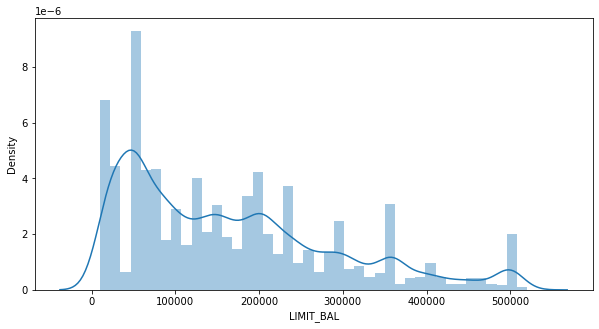

In [53]:

plt.figure(figsize=(10,5))
sns.distplot(df['LIMIT_BAL'], kde=True)
plt.show()

In [54]:
df['Limit Balance'] = pd.cut(df['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(df['Limit Balance'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]      39
Name: Limit Balance, dtype: int64


In [55]:
df['Default'].groupby(df['Limit Balance']).value_counts(normalize = True)*100

Limit Balance      Default
(5000, 50000]      0          68.212611
                   1          31.787389
(50000, 100000]    0          74.201576
                   1          25.798424
(100000, 150000]   0          78.856996
                   1          21.143004
(150000, 200000]   0          82.151835
                   1          17.848165
(200000, 300000]   0          83.949397
                   1          16.050603
(300000, 400000]   0          85.936934
                   1          14.063066
(400000, 500000]   0          87.859825
                   1          12.140175
(500000, 1100000]  0          89.743590
                   1          10.256410
Name: Default, dtype: float64

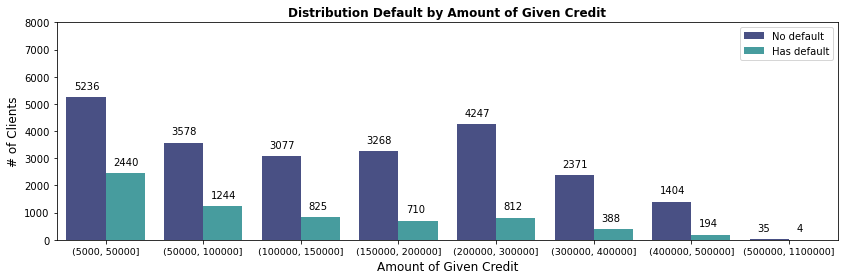

In [56]:
plt.figure(figsize=(14,4))

df['Limit Balance'] = df['Limit Balance'].astype('str')
LimitBal_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data = df, x = 'Limit Balance', hue="Default", palette = 'mako', order = LimitBal_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,8000)
ax.tick_params(axis="x", labelsize= 9.5)
plt.legend(labels=['No default', 'Has default'])
plt.title('Distribution Default by Amount of Given Credit',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

In [57]:
df.groupby(by=['SEX', 'Limit Balance'])['Default'].value_counts(normalize = True)

SEX  Limit Balance      Default
1    (100000, 150000]   0          0.756659
                        1          0.243341
     (150000, 200000]   0          0.784381
                        1          0.215619
     (200000, 300000]   0          0.824561
                        1          0.175439
     (300000, 400000]   0          0.857399
                        1          0.142601
     (400000, 500000]   0          0.866022
                        1          0.133978
     (5000, 50000]      0          0.680268
                        1          0.319732
     (50000, 100000]    0          0.719975
                        1          0.280025
     (500000, 1100000]  0          0.857143
                        1          0.142857
     nan                0          0.906667
                        1          0.093333
2    (100000, 150000]   0          0.806208
                        1          0.193792
     (150000, 200000]   0          0.842750
                        1          0.157250


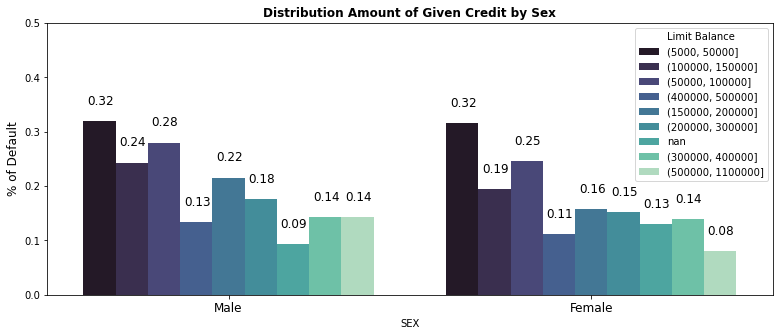

In [58]:
plt.figure(figsize=(13,5))

ax = sns.barplot(x = "SEX", y = "Default", hue = "Limit Balance", data = df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.title('Distribution Amount of Given Credit by Sex',weight ='bold')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.01, p.get_height()+0.03),fontsize=12)

plt.show()

In [59]:
df.groupby(by=['MARRIAGE', 'Limit Balance'])['Default'].value_counts(normalize = True)*100

MARRIAGE  Limit Balance      Default
1         (100000, 150000]   0           77.330126
                             1           22.669874
          (150000, 200000]   0           80.156658
                             1           19.843342
          (200000, 300000]   0           81.903643
                             1           18.096357
          (300000, 400000]   0           85.575589
                             1           14.424411
          (400000, 500000]   0           86.555556
                             1           13.444444
          (5000, 50000]      0           65.117845
                             1           34.882155
          (50000, 100000]    0           71.394799
                             1           28.605201
          (500000, 1100000]  0           94.736842
                             1            5.263158
          nan                0           80.487805
                             1           19.512195
2         (100000, 150000]   0           80.0

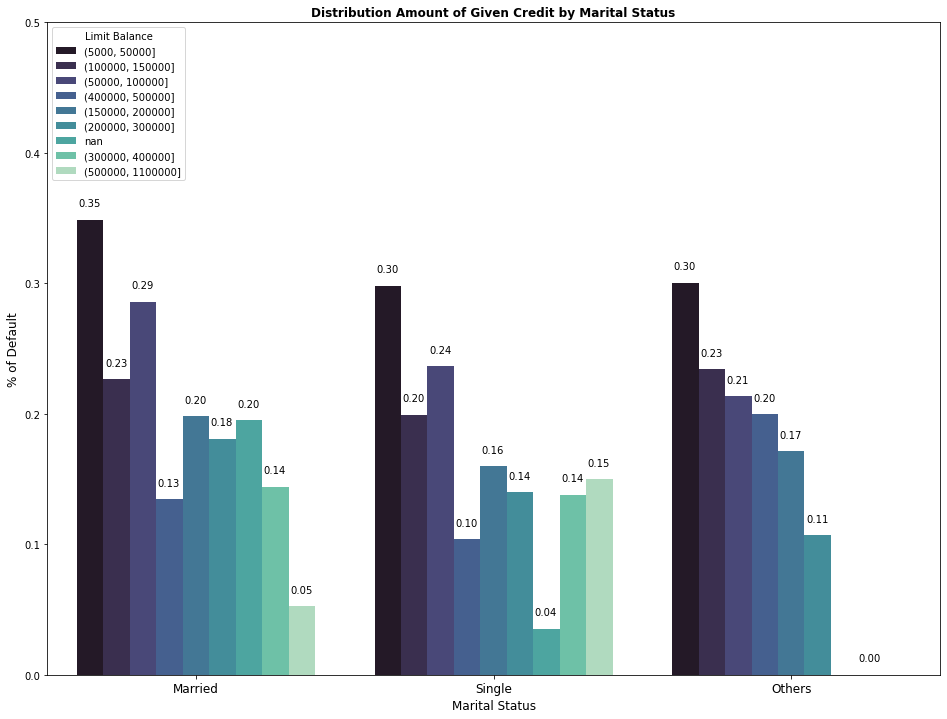

In [60]:
plt.figure(figsize=(16,12))

ax = sns.barplot(x = "MARRIAGE", y = "Default", hue = "Limit Balance", data = df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.xlabel("Marital Status", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 12)
plt.title('Distribution Amount of Given Credit by Marital Status',weight ='bold')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.005, p.get_height()+0.01),fontsize=10)
plt.show()

In [61]:
df.groupby(by=['EDUCATION', 'Limit Balance'])['Default'].value_counts(normalize = True)*100

EDUCATION  Limit Balance      Default
1          (100000, 150000]   0           78.257687
                              1           21.742313
           (150000, 200000]   0           82.121573
                              1           17.878427
           (200000, 300000]   0           83.972720
                                            ...    
4          (50000, 100000]    0           90.163934
                              1            9.836066
           (500000, 1100000]  0          100.000000
           nan                0           75.000000
                              1           25.000000
Name: Default, Length: 68, dtype: float64

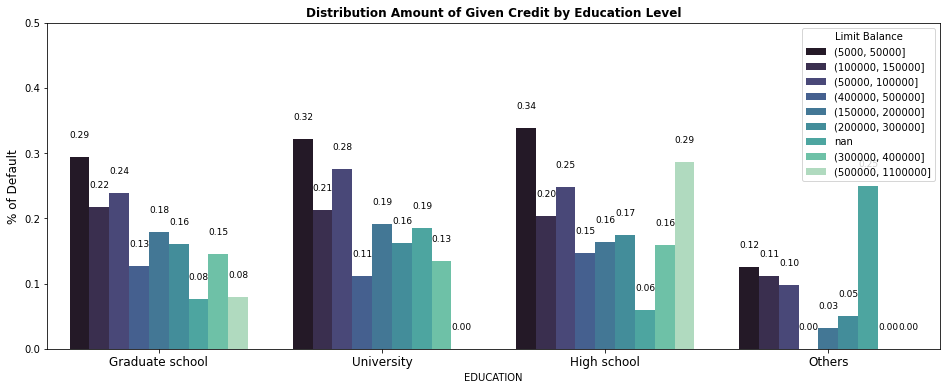

In [62]:
plt.figure(figsize=(16,6))

ax = sns.barplot(x = "EDUCATION", y = "Default", hue = "Limit Balance", data = df, palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Graduate school', 'University', 'High school', 'Others'], fontsize = 12)
plt.title('Distribution Amount of Given Credit by Education Level',weight ='bold')

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.001, p.get_height()+0.03),fontsize=9)

plt.show()

In [63]:
df.groupby(by=['Age_group', 'Limit Balance'])['Default'].value_counts(normalize = True)*100

Age_group  Limit Balance      Default
(20, 25]   (100000, 150000]   0           79.710145
                              1           20.289855
           (150000, 200000]   0           85.714286
                              1           14.285714
           (200000, 300000]   0           81.879195
                                            ...    
(60, 80]   (5000, 50000]      1           36.538462
           (50000, 100000]    0           75.609756
                              1           24.390244
           (500000, 1100000]  0          100.000000
           nan                0          100.000000
Name: Default, Length: 118, dtype: float64

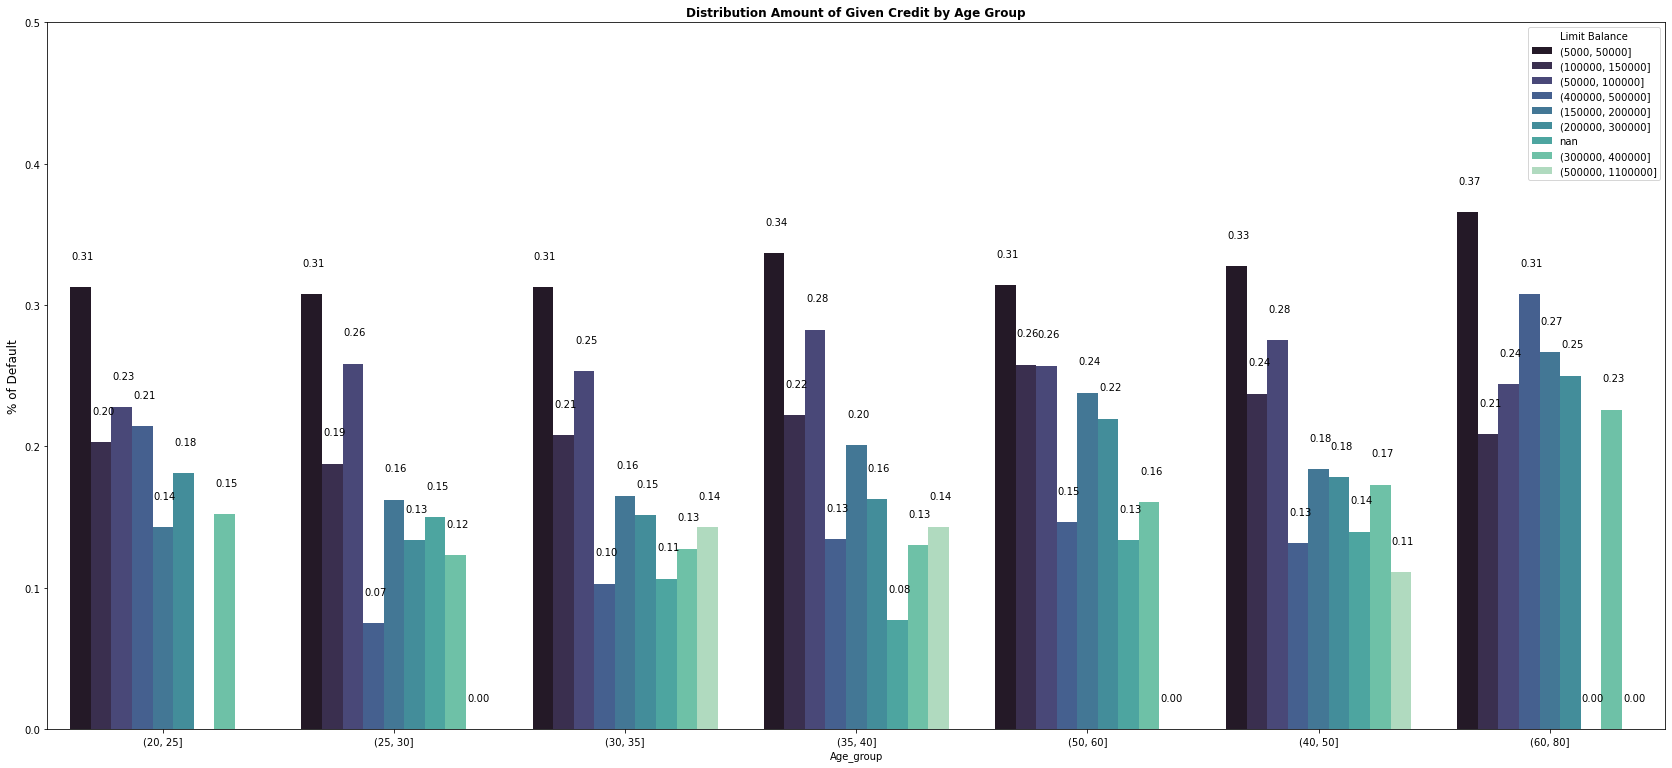

In [64]:
plt.figure(figsize=(29,13))

ax = sns.barplot(x = "Age_group", y = "Default", hue = "Limit Balance", data = df,palette = 'mako', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.title('Distribution Amount of Given Credit by Age Group',weight ='bold')


for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.005, p.get_height()+0.02),fontsize=10)

plt.show()

> Monthly repayment status (for 6 months) (PAY_X)

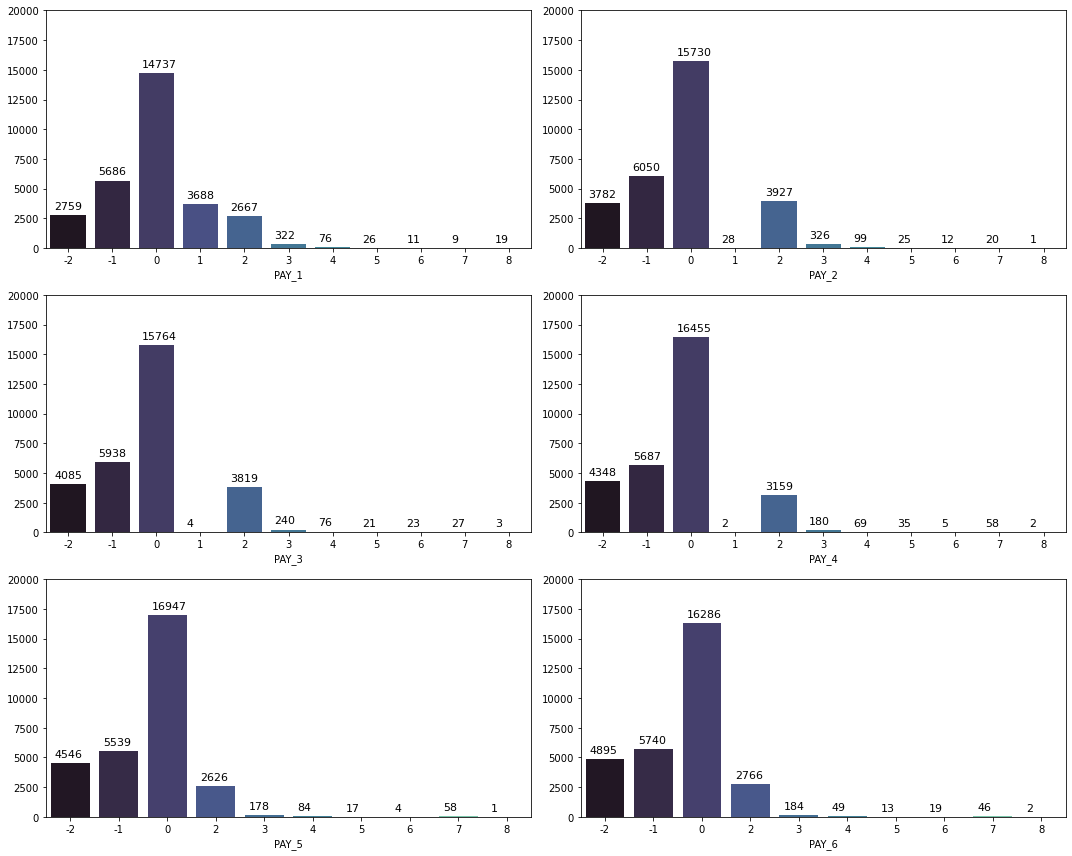

In [65]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'mako')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.show()

The slower the repayment, the higher the chance of default.

> Monthly invoice amount (for 6 months)(BILL_AMTX)

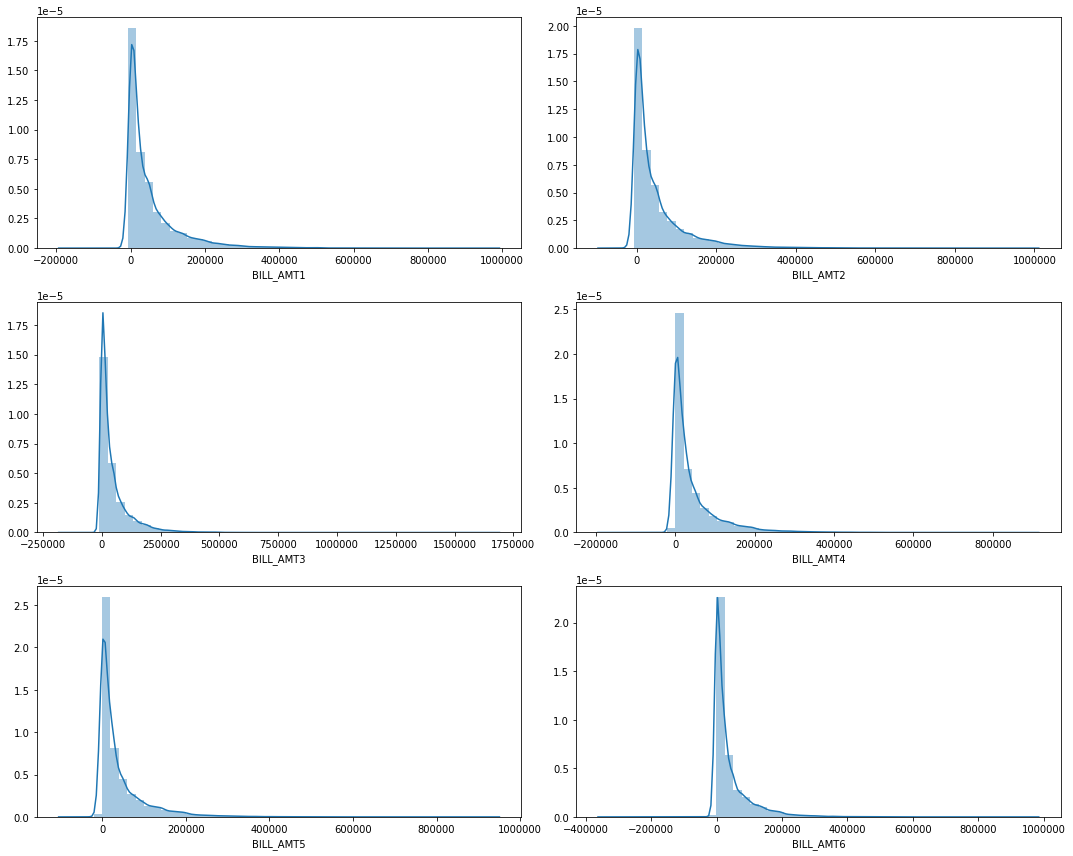

In [ ]:
bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x')   
    plt.ylabel('')
    plt.tight_layout()

plt.show()

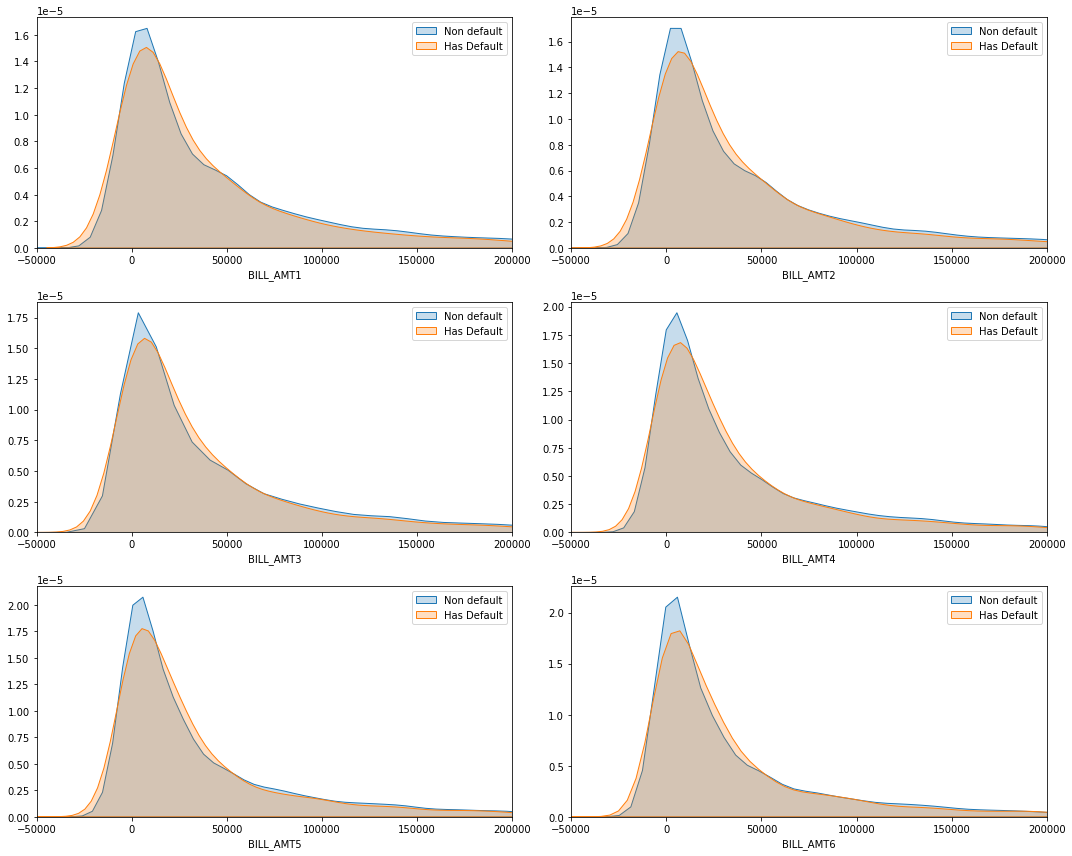

In [ ]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(df.loc[(df['Default'] == 0), col], label = 'Non default', shade = True)
    sns.kdeplot(df.loc[(df['Default'] == 1), col], label = 'Has Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [66]:
df.drop('Age_group', axis = 1, inplace = True)
df.drop('Limit Balance', axis = 1, inplace = True)

Default
0    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
1    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
dtype: object

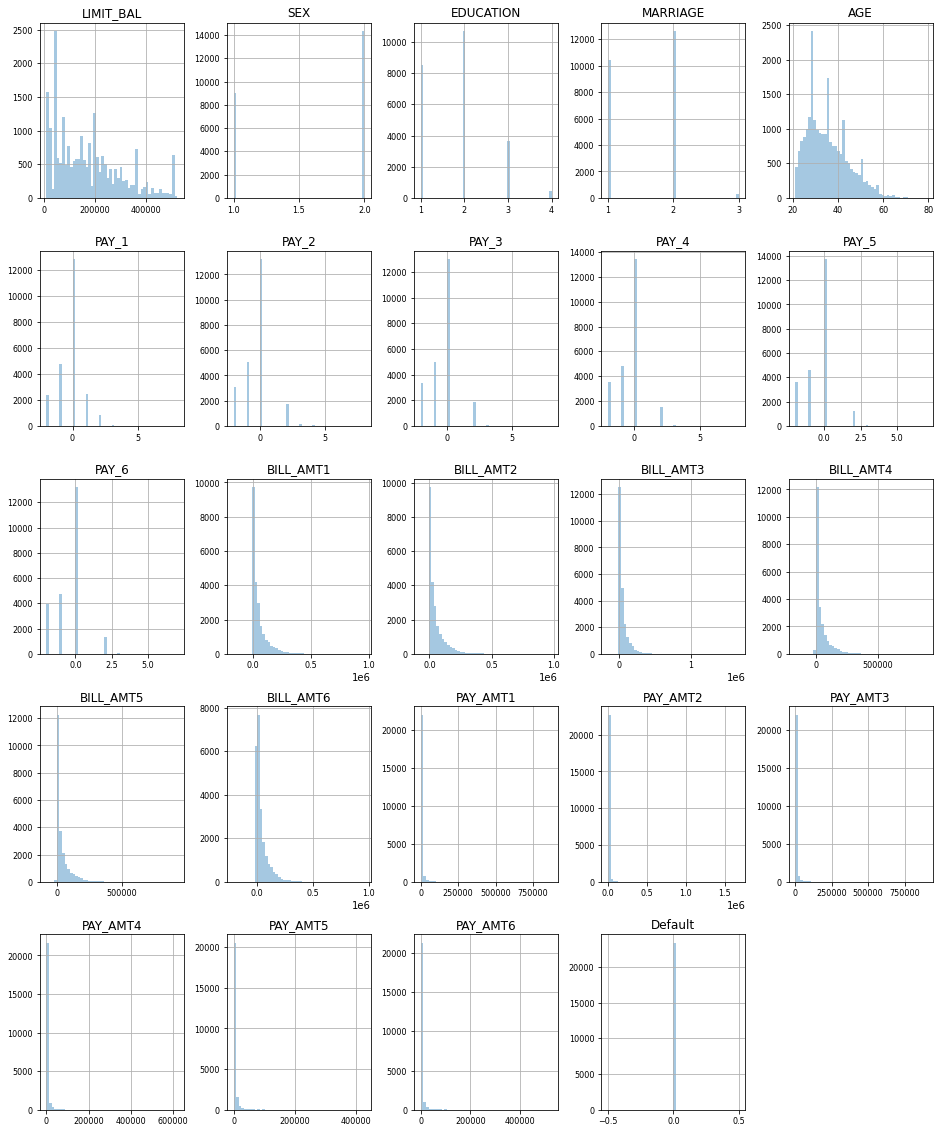

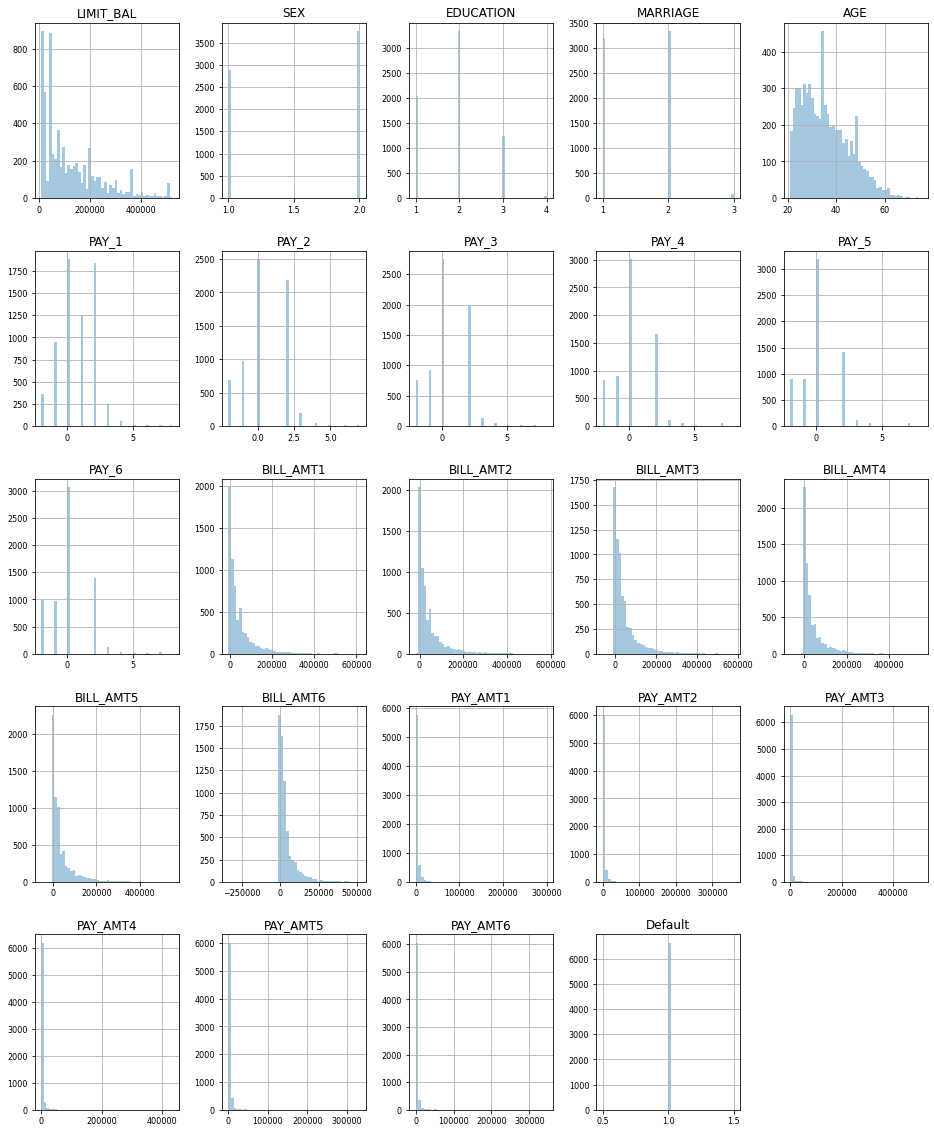

In [67]:
# Visualize default through variables
df.groupby('Default').hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,alpha=0.4)


<AxesSubplot:title={'center':'Amount of credit limit - Density Plot'}, xlabel='LIMIT_BAL', ylabel='Density'>

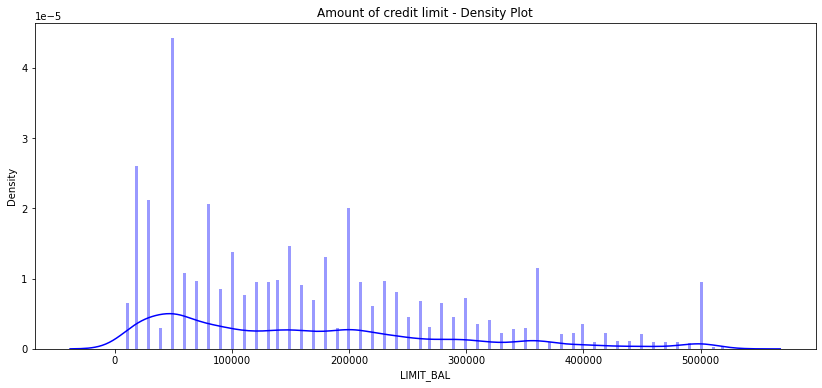

In [68]:
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")

<AxesSubplot:title={'center':'Default amount of credit limit (grouped by Payment Next Month)'}, xlabel='LIMIT_BAL', ylabel='Density'>

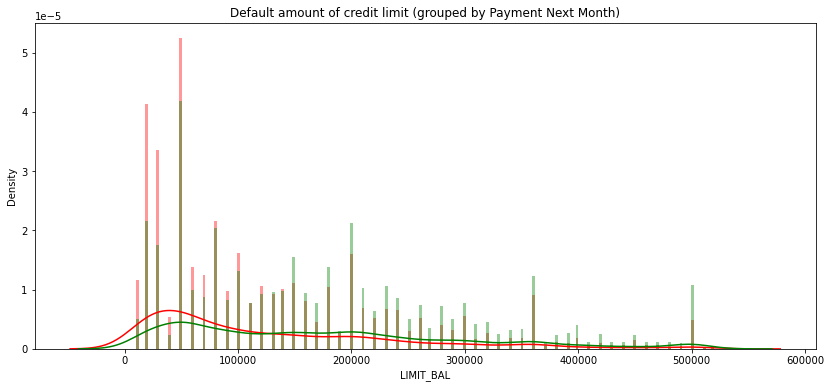

In [69]:
class_0 = df.loc[df['Default'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['Default'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit (grouped by Payment Next Month)')
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")

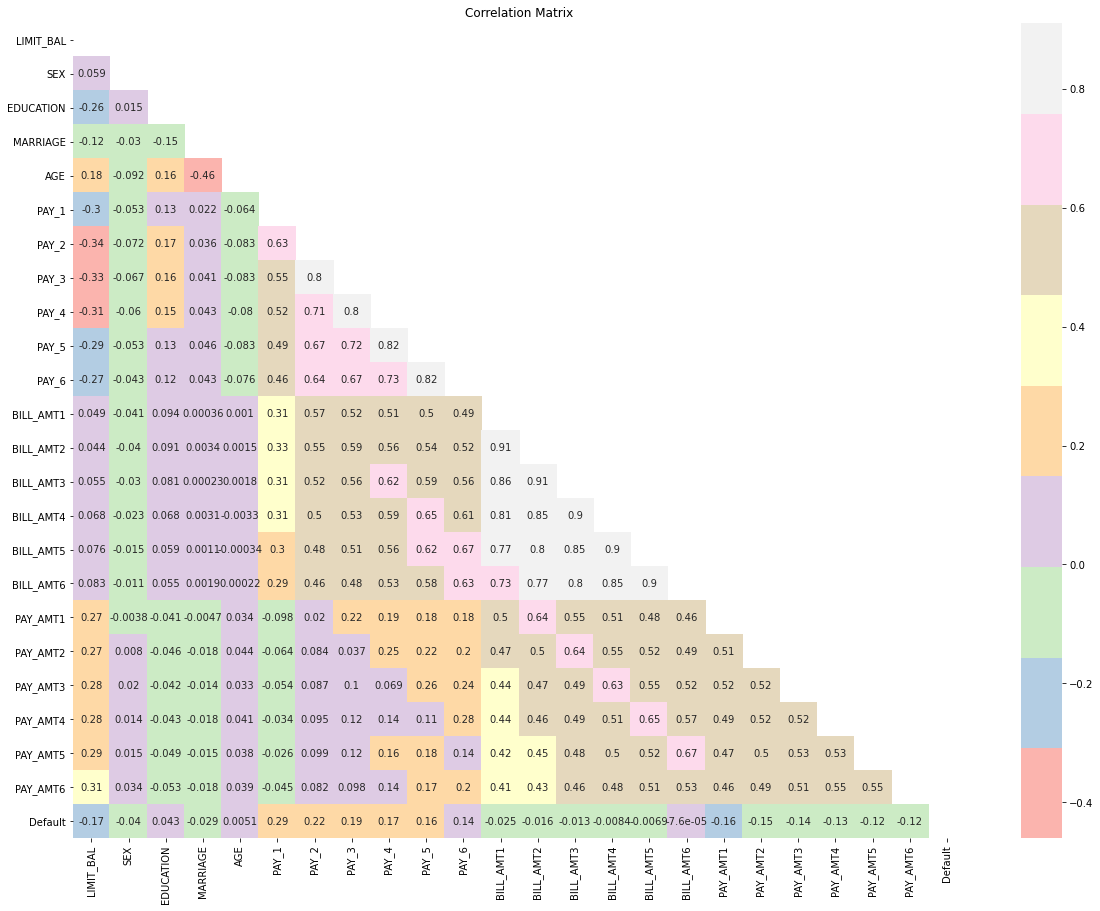

In [70]:
corr_matrix = df.corr(method='spearman')

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap='Pastel1', annot=True, fmt='.2g', mask=np.triu(corr_matrix))
plt.title("Correlation Matrix")
plt.show()

# One - hot coding

In [71]:
df_copy.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [72]:
df_copy.rename(columns = {'PAY_0':'PAY_1', 'default.payment.next.month':'Default'}, inplace = True)

In [73]:
print("SEX", df_copy.SEX.unique())
print('EDUCATION', df_copy.EDUCATION.unique())
print('PAY_1', df_copy.PAY_1.unique())
print('MARRIAGE', df_copy.MARRIAGE.unique())
print('Default', df_copy.Default.unique())

SEX [2 1]
EDUCATION [2 1 3 4]
PAY_1 [ 2 -1  0 -2  1  3  4  8  7  5  6]
MARRIAGE [1 2 3]
Default [1 0]


In [74]:
df_copy['Default'].value_counts()

0    23364
1     6636
Name: Default, dtype: int64

In [75]:
df_copy.replace({'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others'},
                        'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [76]:
df_copy = pd.get_dummies(df_copy,columns=['EDUCATION','MARRIAGE'])

In [77]:
#get dummies
df_copy = pd.get_dummies(df_copy, columns = ['PAY_1',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6'], drop_first = True )

In [78]:
df_copy.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default',
       'EDUCATION_4', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_university', 'MARRIAGE_married', 'MARRIAGE_others',
       'MARRIAGE_single', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2',
       'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8',
       'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4',
       'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6',
       'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2',
       'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8',
       'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5',
       'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_

In [79]:
df_copy.shape

(30000, 81)

In [80]:
df_copy.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,20000.0,2,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,120000.0,2,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,90000.0,2,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,0,1,0,0,0,0,0,0,0
3,50000.0,2,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,0,1,0,0,0,0,0,0,0
4,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,0,1,0,0,0,0,0,0,0


# Build classifier using different Machine Learning algorihtms

In [ ]:
cat_columns = []
num_columns = []

for columns in df_copy.columns:
    if df_copy[columns].nunique()<12:
        cat_columns.append(columns)
    else:
        num_columns.append(columns)
    
print("Categorical Columns Are : ", cat_columns)
print("Numerical Columns Are : ", num_columns)

Categorical Columns Are :  ['SEX', 'Default', 'EDUCATION_4', 'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_university', 'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8']
Numerical Columns Are :  ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',

In [ ]:
cat_columns.remove("Default")

print("Categorical Columns Are : ", cat_columns)
print("Numerical Columns Are : ", num_columns)

Categorical Columns Are :  ['SEX', 'EDUCATION_4', 'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_university', 'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single', 'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4', 'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6', 'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4', 'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_5_8', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4', 'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PAY_6_8']
Numerical Columns Are :  ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4'

In [ ]:
data = df_copy.copy()
# Create X and y dataset
y = data['Default']
X = data.drop('Default', axis=1)
    
#Scale Data 
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [ ]:
X

,LIMIT_BAL,SEX,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,-1.136720,0.810161,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,...,-0.005774,-0.486419,-1.089746,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
1,-0.365981,0.810161,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,...,-0.005774,-0.486419,-1.089746,3.137832,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
2,-0.597202,0.810161,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,...,-0.005774,-0.486419,0.917645,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
3,-0.905498,0.810161,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,...,-0.005774,-0.486419,0.917645,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
4,-0.905498,-1.234323,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,...,-0.005774,-0.486419,0.917645,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,0.381275,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,...,-0.005774,-0.486419,0.917645,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
29996,-0.134759,-1.234323,0.815221,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,...,-0.005774,-0.486419,0.917645,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
29997,-1.059646,-1.234323,0.164303,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,...,-0.005774,-0.486419,0.917645,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165
29998,-0.674276,-1.234323,0.598248,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,...,-0.005774,2.055841,-1.089746,-0.318691,-0.078557,-0.040448,-0.020821,-0.025174,-0.039188,-0.008165


In [ ]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Default, Length: 30000, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold

In [ ]:
# Transform numercial columns to approximate Gauss distribution
transformer = ColumnTransformer([("Transformed", PowerTransformer(), num_columns)],remainder="passthrough" )
transformer.fit(X_train)

columns = num_columns+cat_columns
X_train = pd.DataFrame(transformer.transform(X_train), columns = columns)
X_test = pd.DataFrame(transformer.transform(X_test), columns = columns)

In [ ]:
#Build fuction to evaluate classifier
def evaluate_clf (true, predicted):
    acc = accuracy_score(true, predicted)
    prec  = precision_score(true, predicted)
    f1  = f1_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc = roc_auc_score(true,predicted)
    return acc, prec, f1, recall, roc_auc

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
models = {
    "Random Forest" : RandomForestClassifier(),
    "Logistic Regression" : LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVM" : SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Neural Network": MLPClassifier(),
}

In [ ]:
models_list = []
#Creat lists to store evaluation results of testing dataset
list_accur_test = []
list_prec_test= []
list_recc_test = []
list_f1_test = []
list_auc_test = []
 #Creat lists to store evaluation results of training dataset
list_accur_train = []
list_prec_train= []
list_recc_train = []
list_f1_train = []
list_auc_train = []
def clear_list():
  list_accur_test.clear()
  list_prec_test.clear()
  list_recc_test.clear()
  list_f1_test.clear()
  list_auc_test.clear()
  list_accur_train.clear()
  list_prec_train.clear()
  list_recc_train.clear()
  list_f1_train.clear()
  list_auc_train.clear()

In [ ]:
def evaluate_models(X, y, models):
    

    for name, model in models.items():
        

        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        
        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        
        print(name,':')
        models_list.append(name)
        list_accur_test.append(model_test_accuracy)
        list_prec_test.append(model_test_precision)
        list_recc_test.append(model_test_recall)
        list_f1_test.append(model_test_f1)
        list_auc_test.append(model_test_rocauc_score)

        list_accur_train.append(model_train_accuracy)
        list_prec_train.append(model_train_precision)
        list_recc_train.append(model_train_recall)
        list_f1_train.append(model_train_f1)
        list_auc_train.append(model_train_rocauc_score)

        print('Hiệu năng mô hình trên tập dữ liệu huấn luyện')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        
        print('----------------------------------')

        print('Hiệu năng mô hình trên tập dữ liệu kiểm thử')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        
        print('\n')
        

# Model training (Without class imbalance pre-processing)

In [ ]:
report_1= evaluate_models(X_train, y_train, models)

In [ ]:
print (models_list)
print (list_accur_test)
print (list_accur_train)

['Random Forest', 'Logistic Regression', 'KNeighborsClassifier', 'SVM', 'Decision Tree', 'Neural Network']
[0.8155, 0.8171666666666667, 0.7923333333333333, 0.8198333333333333, 0.7245, 0.8016666666666666]
[0.9994583333333333, 0.8214583333333333, 0.8449583333333334, 0.8294166666666667, 0.9994583333333333, 0.859125]


# # Model training (With class imbalance pre-processing)

Here we use two main techniques to deal with imbalanced data:

1. UnderSampling
  * Random UnderSampling
  * NearMiss
2. OverSampling
  * Random OverSampling (Use built-in library)
  * SMOTE








## UnderSampling



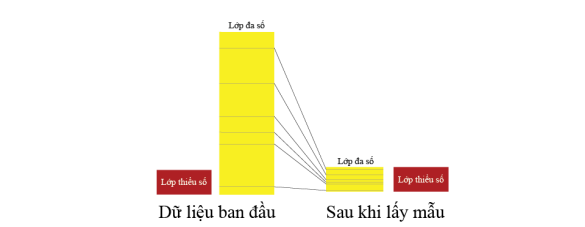

### Random UnderSampling

In [ ]:
dataset_0 = df_copy[df_copy.Default==0]
dataset_1 = df_copy[df_copy.Default==1]
dataset_0.shape, dataset_1.shape

((23364, 81), (6636, 81))

In [ ]:
dataset_0_rus = dataset_0.sample(dataset_1.shape[0])
dataset_0_rus.shape

(6636, 81)

In [ ]:
dataset_test_under = pd.concat([dataset_0_rus,dataset_1], axis= 0)
dataset_test_under.shape

(13272, 81)

In [ ]:
#Create X and y dataset
y = dataset_test_under['Default'] 
X = dataset_test_under[df_copy.columns.difference(['Default'])] 
X = pd.get_dummies(X,columns=['SEX'], drop_first = True) 
# #Scale our Data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [ ]:
X

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION_4,EDUCATION_graduate school,EDUCATION_high school,...,PAY_6_6,PAY_6_7,PAY_6_8,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2
0,-0.379872,-0.387255,-0.241006,-0.081713,0.190162,0.634116,0.734406,-0.109059,-0.714312,-0.451453,...,-0.032496,-0.054982,-0.012277,0.425405,0.330321,0.637960,1.507981,0.059693,0.037241,-1.203811
1,-0.486646,-0.675746,-0.674569,-0.671418,-0.659930,-0.646806,-0.642140,-0.109059,1.399949,-0.451453,...,-0.032496,-0.054982,-0.012277,-0.379117,-0.316647,-0.271284,-0.296541,-0.311997,-0.282388,0.830695
2,0.581095,-0.174989,0.049243,-0.598700,-0.659930,-0.646806,-0.642140,-0.109059,-0.714312,-0.451453,...,-0.032496,-0.054982,-0.012277,3.789195,0.300819,-0.271284,-0.296541,-0.311997,-0.282388,0.830695
3,-1.340838,-0.664864,-0.674569,-0.671418,-0.659930,-0.646806,-0.642140,-0.109059,1.399949,-0.451453,...,-0.032496,-0.054982,-0.012277,-0.379117,-0.316647,-0.271284,-0.296541,-0.311997,-0.282388,0.830695
4,-0.913742,-0.580036,-0.606622,-0.658234,0.058629,-0.611437,-0.127692,-0.109059,-0.714312,2.215072,...,-0.032496,-0.054982,-0.012277,0.013892,-0.258032,2.564891,-0.295819,1.979398,0.118363,0.830695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13267,-0.166324,-0.642036,-0.639638,-0.635037,-0.621176,-0.606152,-0.600416,-0.109059,-0.714312,-0.451453,...,-0.032496,-0.054982,-0.012277,-0.379117,-0.316647,-0.271284,-0.296541,-0.311997,-0.282388,-1.203811
13268,-0.166324,0.302616,0.411198,0.483806,0.541761,0.696529,0.712375,-0.109059,-0.714312,-0.451453,...,-0.032496,-0.054982,-0.012277,0.184048,-0.090208,-0.271284,0.208725,-0.311997,-0.026685,-1.203811
13269,0.153999,-0.627675,-0.627678,-0.631283,-0.336282,-0.312107,-0.319075,-0.109059,-0.714312,-0.451453,...,-0.032496,-0.054982,-0.012277,-0.379117,-0.316647,1.062274,0.006619,-0.163321,-0.084218,-1.203811
13270,0.581095,-0.697927,0.420573,0.438985,0.158166,-0.454023,0.174728,-0.109059,-0.714312,2.215072,...,-0.032496,-0.054982,-0.012277,6.531731,-0.096096,-0.199878,-0.157521,3.625242,-0.167066,-1.203811


In [ ]:
y

17958    0
4976     0
2459     0
5797     0
21459    0
        ..
29991    1
29994    1
29997    1
29998    1
29999    1
Name: Default, Length: 13272, dtype: int64

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    

transformer = ColumnTransformer([("Transformed", PowerTransformer(), num_columns)],remainder="passthrough" )
transformer.fit(X_train)

columns = num_columns+cat_columns
X_train = pd.DataFrame(transformer.transform(X_train), columns = columns)
X_test = pd.DataFrame(transformer.transform(X_test), columns = columns)

# clear list for visualization
clear_list()

In [ ]:
report_2= evaluate_models(X_train, y_train, models)

Random Forest :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.9992
- F1 score: 0.9989
- Precision: 0.9992
- Recall: 0.9996
- Roc Auc Score: 0.9992
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.6938
- F1 score: 0.7385
- Precision: 0.6636
- Recall: 0.6026
- Roc Auc Score: 0.6940


Logistic Regression :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.7181
- F1 score: 0.7788
- Precision: 0.6833
- Recall: 0.6087
- Roc Auc Score: 0.7180
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.6942
- F1 score: 0.7547
- Precision: 0.6545
- Recall: 0.5778
- Roc Auc Score: 0.6945


KNeighborsClassifier :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.7802
- F1 score: 0.7940
- Precision: 0.7747
- Recall: 0.7563
- Roc Auc Score: 0.7801
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.6599
- F1 score: 0.6731
- Precision: 0.6482
- Recal

### NearMiss
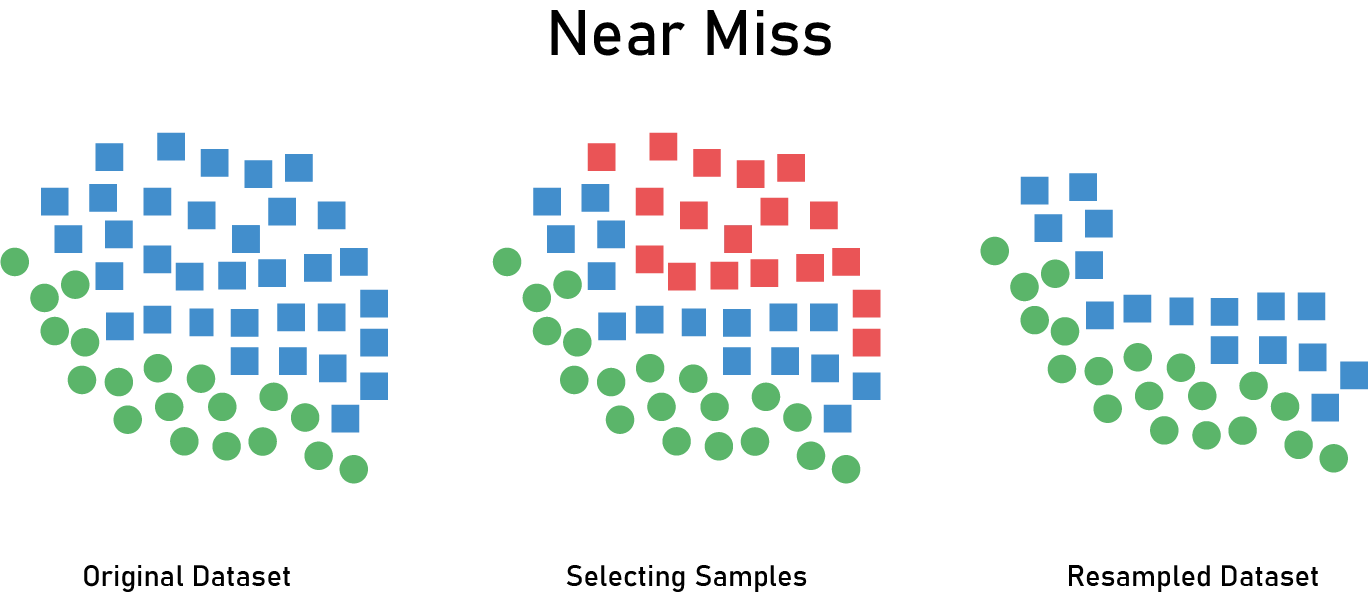

In [ ]:
X = df_copy[df_copy.columns.difference(['Default'])] 
y = df_copy['Default'] 
X = pd.get_dummies(X,columns=['SEX'], drop_first = True) 
from imblearn.under_sampling import NearMiss
nm = NearMiss()

X_near, y_near = nm.fit_resample(X,y)
X_near.shape, y_near.shape

((13272, 80), (13272,))

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_near,y_near,test_size=0.2,random_state=42)

transformer = ColumnTransformer([("Transformed", PowerTransformer(), num_columns)],remainder="passthrough" )
transformer.fit(X_train)

columns = num_columns+cat_columns
X_train = pd.DataFrame(transformer.transform(X_train), columns = columns)
X_test = pd.DataFrame(transformer.transform(X_test), columns = columns)

# Clear list for visualization
clear_list()

In [ ]:
report_3= evaluate_models(X_train, y_train, models)

Random Forest :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.9985
- F1 score: 0.9991
- Precision: 0.9985
- Recall: 0.9979
- Roc Auc Score: 0.9985
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.7533
- F1 score: 0.7836
- Precision: 0.7404
- Recall: 0.7017
- Roc Auc Score: 0.7534


Logistic Regression :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.7213
- F1 score: 0.7850
- Precision: 0.6859
- Recall: 0.6090
- Roc Auc Score: 0.7212
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.7062
- F1 score: 0.7725
- Precision: 0.6670
- Recall: 0.5868
- Roc Auc Score: 0.7065


KNeighborsClassifier :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.7897
- F1 score: 0.8483
- Precision: 0.7701
- Recall: 0.7052
- Roc Auc Score: 0.7896
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.6798
- F1 score: 0.7407
- Precision: 0.6352
- Recal

## OverSampling



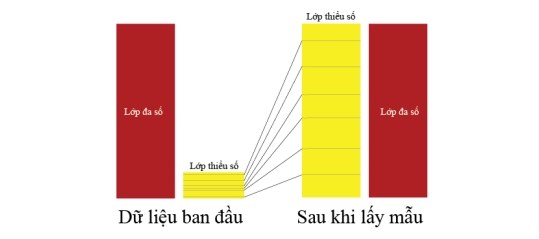

### Random OverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

X = df_copy[df_copy.columns.difference(['Default'])] 
y = df_copy['Default'] 

X = pd.get_dummies(X,columns=['SEX'], drop_first = True) 
from imblearn.under_sampling import NearMiss

X_ros, y_ros = ros.fit_resample(X,y)
X_ros.shape, y_ros.shape

((46728, 80), (46728,))

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size=0.2,random_state=42)




transformer = ColumnTransformer([("Transformed", PowerTransformer(), num_columns)],remainder="passthrough" )
transformer.fit(X_train)

columns = num_columns+cat_columns
X_train = pd.DataFrame(transformer.transform(X_train), columns = columns)
X_test = pd.DataFrame(transformer.transform(X_test), columns = columns)

# Clear list for visualization
clear_list()

In [ ]:
report_4= evaluate_models(X_train, y_train, models)

Random Forest :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.9996
- F1 score: 0.9993
- Precision: 0.9996
- Recall: 0.9999
- Roc Auc Score: 0.9996
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.9351
- F1 score: 0.9089
- Precision: 0.9372
- Recall: 0.9673
- Roc Auc Score: 0.9350


Logistic Regression :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.7120
- F1 score: 0.7585
- Precision: 0.6832
- Recall: 0.6215
- Roc Auc Score: 0.7119
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.7058
- F1 score: 0.7526
- Precision: 0.6767
- Recall: 0.6147
- Roc Auc Score: 0.7059


KNeighborsClassifier :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.8444
- F1 score: 0.7949
- Precision: 0.8564
- Recall: 0.9283
- Roc Auc Score: 0.8445
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.7614
- F1 score: 0.7240
- Precision: 0.7804
- Recal

### SMOTE


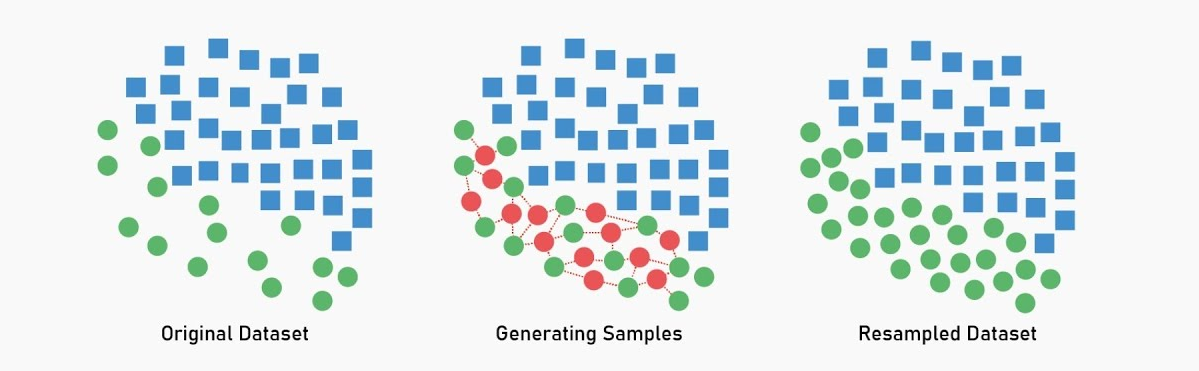

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
over_sam = SMOTETomek(sampling_strategy="minority", random_state=42)


In [ ]:
X_res, y_res = over_sam.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
transformer = ColumnTransformer([("Transformed", PowerTransformer(), num_columns)],remainder="passthrough" )
transformer.fit(X_train)

columns = num_columns+cat_columns
X_train = pd.DataFrame(transformer.transform(X_train), columns = columns)
X_test = pd.DataFrame(transformer.transform(X_test), columns = columns)

# Clear list for visualization
clear_list()

In [ ]:
report_5= evaluate_models(X_train, y_train, models)

Random Forest :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.9995
- F1 score: 0.9995
- Precision: 0.9995
- Recall: 0.9995
- Roc Auc Score: 0.9995
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.8795
- F1 score: 0.9104
- Precision: 0.8753
- Recall: 0.8429
- Roc Auc Score: 0.8796


Logistic Regression :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.8466
- F1 score: 0.8935
- Precision: 0.8367
- Recall: 0.7867
- Roc Auc Score: 0.8466
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.8475
- F1 score: 0.8942
- Precision: 0.8387
- Recall: 0.7897
- Roc Auc Score: 0.8477


KNeighborsClassifier :
Hiệu năng mô hình trên tập dữ liệu huấn luyện
- Accuracy: 0.8922
- F1 score: 0.8969
- Precision: 0.8915
- Recall: 0.8861
- Roc Auc Score: 0.8922
----------------------------------
Hiệu năng mô hình trên tập dữ liệu kiểm thử
- Accuracy: 0.8406
- F1 score: 0.8413
- Precision: 0.8412
- Recal

In [ ]:
pd.DataFrame({'Classifier':models_list, 'Train Accuracy': list_accur_train, 'Test Accuracy': list_accur_test, 'Precision Score': list_prec_test, 'Recall Score': list_recc_test, 'F1 Score': list_f1_test })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Random Forest,0.999478,0.879477,0.875327,0.842854,0.910402
1,Logistic Regression,0.846619,0.847506,0.838680,0.789670,0.894176
2,KNeighborsClassifier,0.892216,0.840584,0.841195,0.841103,0.841287
3,SVM,0.866148,0.860141,0.848326,0.779164,0.930962
4,Decision Tree,0.999478,0.795759,0.800429,0.815933,0.785504
5,Neural Network,0.889441,0.863107,0.854711,0.802145,0.914649


# Final model: Random Forest


In [ ]:
clf_RandForest = RandomForestClassifier()
clf_RandForest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predict_test = clf_RandForest.predict(X_test)
predict_train = clf_RandForest.predict(X_train)

In [ ]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[4418  269]
 [ 835  478]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [ ]:
score = roc_auc_score(y_train, predict_train)
print(f"ROC AUC: {score:.4f}")


ROC AUC: 0.9990


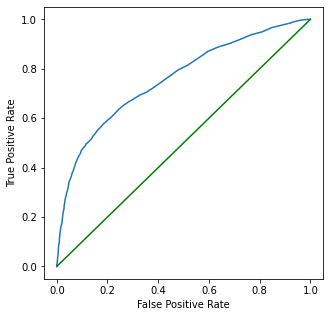

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_proba = clf_RandForest.predict_proba(X_test)
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
plot_sklearn_roc_curve(y_test, y_proba[:, 1])

In [ ]:
#Save predicting result
pred_result =  pd.DataFrame(predict_test.tolist ())
pred_result.to_excel("pred_result.xlsx")
y_test.to_excel("Y_test.xlsx")

# Conclusion

* The number of customers likely to default is less than the number of customers unlikely to default.
* Female customers hold more credit cards than male customers
* Number of credit card holders decreases by: college > graduate > high school student
* The number of single customers who can credit is more likely than the other group
* The possibility of default mainly occurs when the credit limit is less than 2000000
* The probability of a customer paying late for more than 2 months is very low
* The payment amount of the customer who is likely to default is less than that of the customer who is not likely to default

* The variable PAY_1 is very important for the data set, this variable not only shows the customer's payment behavior in September, but also indicates the customer's behavior from April to September. So when sales Businesses consider issuing credit cards to customers, this is very important for businesses, they can check the customer's payment history to see if this customer has paid on time or has a bill. unpaid or not.

* For customers who pay on time, tend to have better credit scores, so banks want to increase the credit limit of these customers, accepting less risk. Therefore, if a potential customer already has a credit card with a high credit limit, the customer is highly unlikely to default in the future.

*Although financial institutions often collect customers' personal information such as age, education and marital status when people apply for a credit card. In other words, financial institutions should also consider their potential customers male or female, bachelor's or master's degree, single or married when deciding whether to accept credit card applications/ their loan or not.

* Credit limit is a good indicator of financial stability. Whatever mechanism the bank is currently using works well, and some of the features related to credit line selection can be used in the direct model to predict default.
* Business professionals and Machine Learning teams must discuss the trade-offs of accuracy recall to get the most benefit from predictive modeling.
Banks can use this model not only as a predictor but also proactively prevent default.